In [2]:
import sys
from pathlib import Path
sys.path.append(str(Path('__file__').resolve().parent.parent))

In [7]:
import math

import numpy as np

from hundun.equations.henon import Henon
from hundun.equations.logistic import Logistic
from hundun.equations.lorenz import Lorenz
from hundun.utils._draw import Drawing

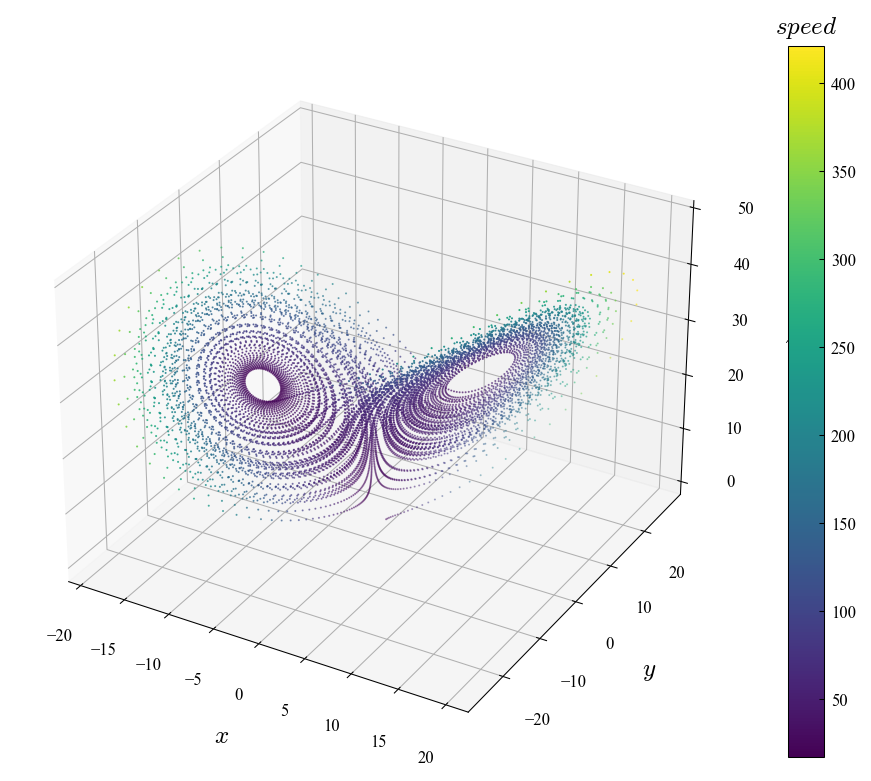

In [4]:
lorenz = Lorenz()

u_seq, speed = [], []

tu = (0, np.array([1,1,1]))
for _ in range(10000):
    tu = lorenz.solve(*tu)
    u_seq.append(tu.u)
    speed.append(np.sqrt(np.sum(lorenz(tu.t, tu.u)**2)))

u_seq = np.array(u_seq)

draw = Drawing(1, 1, three=True)

c = draw[0,0].scatter(u_seq[:,0], u_seq[:,1], u_seq[:,2], c=speed, s=1)
clb = draw.fig.colorbar(c, ax=draw[0,0])
clb.ax.set_title(label='$speed$')
draw[0,0].set_axis_label('x', 'y', 'z', tex=True)

draw.show()

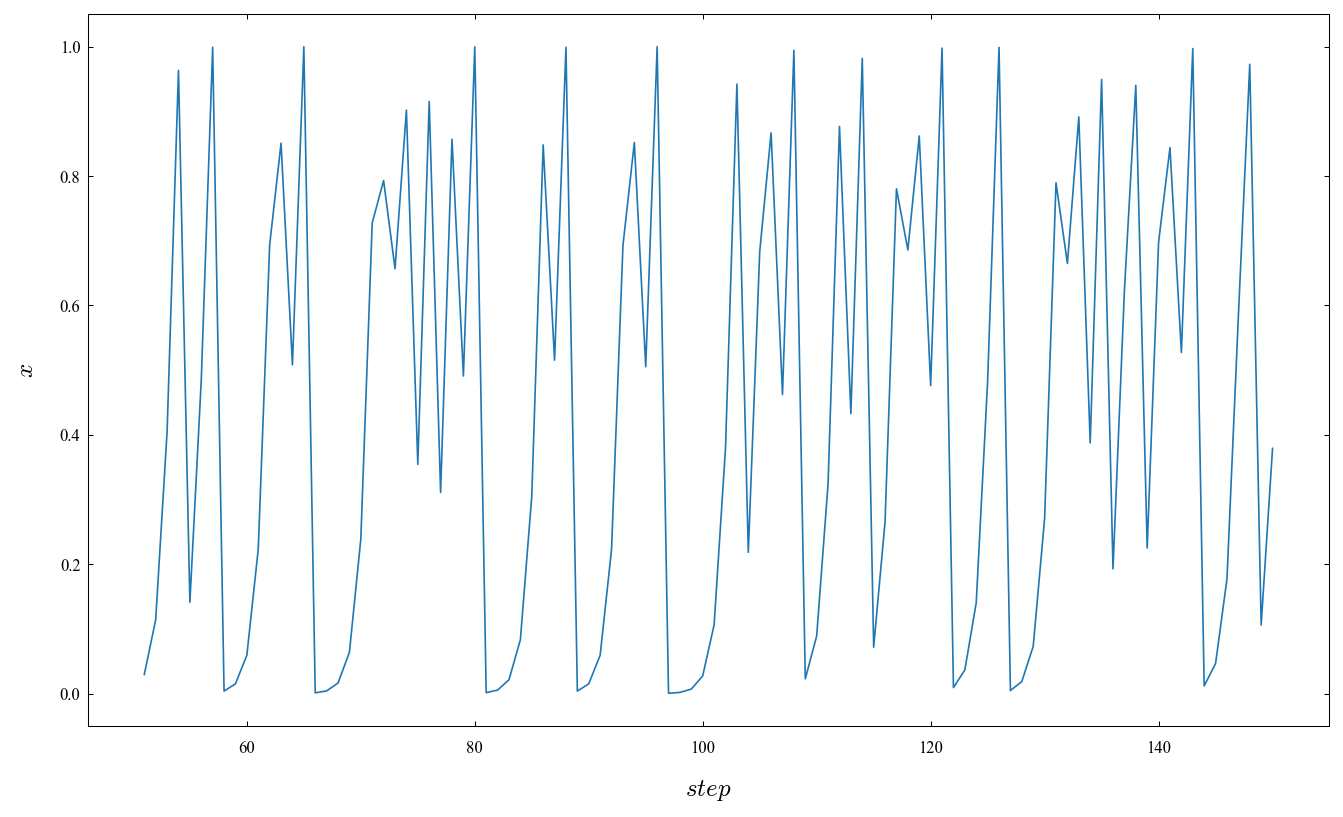

In [5]:
l = Logistic.on_attractor()
l.solve_n_times(100)

d = Drawing()
d[0,0].plot(l.t_seq, l.u_seq)
d[0,0].set_axis_label('step', 'x')
d.show()

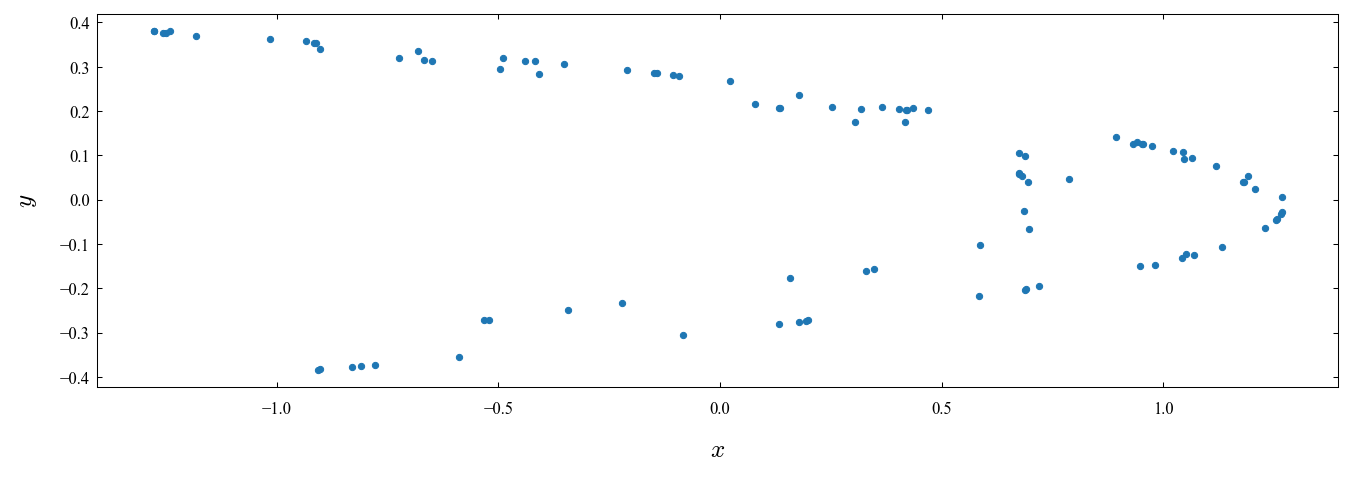

In [8]:
while True:
    henon = Henon.on_attractor()
    us = np.array([henon.solve(*henon.internal_state).u for _ in range(100)])
    if all(abs(us[-1])!=math.inf):
        break

d = Drawing()
d[0,0].scatter(us[:,0], us[:,1])
d[0,0].set_aspect('equal')
d[0,0].set_axis_label('x', 'y')

d.show()